参考： [点赞收藏！PyTorch 常用代码段整理合集](https://mp.weixin.qq.com/s/2bpT93KrqwWfE-Ob0iC8xA)


1. 基本配置
2. 张量处理
3. 构建数据集
4. 模型定义和操作

In [59]:
import torch
import torch.nn as nn


## 1. 基本配置

### 导入包和版本查询

In [62]:

import torch
import torch.nn as nn
# import torchvision
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
# print(torch.cuda.get_device_name(0))

1.11.0
None
None


## 2. 张量处理

### 张量基本信息
- dtype    数据类型
- shape/ size()
- dim() 维度：0，1，2，3

In [17]:
import numpy as np
import torch 

i = torch.tensor(1);print(i,i.dtype)
x = torch.tensor(2.0);print(x,x.dtype)
b = torch.tensor(True);print(b,b.dtype)

tensor(1) torch.int64
tensor(2.) torch.float32
tensor(True) torch.bool


In [8]:
a = torch.tensor([1,2,6], dtype=torch.long)
a.shape

torch.Size([3])

In [23]:
tensor2 = torch.tensor([[1.0,1,2],
                        [9,6.0,5]])  # 2维张量
print(tensor2, tensor2.dtype)
print(tensor2.dim())
tensor2.shape, tensor2.size()

tensor([[1., 1., 2.],
        [9., 6., 5.]]) torch.float32
2


(torch.Size([2, 3]), torch.Size([2, 3]))

### 张量切片

In [37]:

import numpy as np

a = torch.rand(2, 3)
print(a)
b = torch.BoolTensor(np.array([1,0,2,0])); print(b,b.dtype)
a.dim(), a[1,:], a[1,1], a[:,0], a[:,2]

tensor([[0.1093, 0.2145, 0.2509],
        [0.2316, 0.9392, 0.2257]])
tensor([ True, False,  True, False]) torch.bool


(2,
 tensor([0.2316, 0.9392, 0.2257]),
 tensor(0.9392),
 tensor([0.1093, 0.2316]),
 tensor([0.2509, 0.2257]))

###  自动微分

In [40]:
x = torch.tensor([2.], requires_grad=True)
>>> y = torch.tensor([3.], requires_grad=True)
>>> z= (x+y) * (y-2)
>>> a
>>> z
>>> z.backward()
>>> x.grad, y.grad


(tensor([1.]), tensor([6.]))

## 3  构建数据集

### DataLoader

In [1]:
import torch
import torch.utils.data as Data
batch_size = 3
x = torch.linspace(1,10,10)  # 1 -->10, 共产生 10 个数据
y = torch.linspace(10,1,10)
x,y, x.shape, y.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.]),
 torch.Size([10]),
 torch.Size([10]))

In [2]:
# 将 x,y 组成一个完整的数据集, 并转化为pytorch能识别的数据集类型：

torch_dataset = Data.TensorDataset(x,y)
type(torch_dataset)

torch.utils.data.dataset.TensorDataset

In [10]:
# 产生迭代器
"""
dataset：Dataset类型，从其中加载数据 
batch_size：int，可选。每个batch加载多少样本 
shuffle：bool，可选。为True时表示每个epoch都对数据进行洗牌 
sampler：Sampler，可选。从数据集中采样样本的方法。 
num_workers：int，可选。加载数据时使用多少子进程。默认值为0，表示在主进程中加载数据。 
collate_fn：callable，可选。 
pin_memory：bool，可选 
drop_last：bool，可选。True表示如果最后剩下不完全的batch,丢弃。False表示不丢弃。
"""
loader = Data.DataLoader(dataset = torch_dataset,
                        batch_size = batch_size,
                        shuffle = True,  # 每个epoch 打乱数据
                        num_workers =2)  # 多线程读取数据
for epoch in range(3):
    i =0
    for batch_x, batch_y in loader:
        i += 1
        print(f'Epoch: {epoch} | num:{i} | batch_x: {batch_x} | batch_y: {batch_y}')

Epoch: 0 | num:1 | batch_x: tensor([8., 7., 2.]) | batch_y: tensor([3., 4., 9.])
Epoch: 0 | num:2 | batch_x: tensor([3., 5., 1.]) | batch_y: tensor([ 8.,  6., 10.])
Epoch: 0 | num:3 | batch_x: tensor([ 9., 10.,  4.]) | batch_y: tensor([2., 1., 7.])
Epoch: 0 | num:4 | batch_x: tensor([6.]) | batch_y: tensor([5.])
Epoch: 1 | num:1 | batch_x: tensor([2., 5., 4.]) | batch_y: tensor([9., 6., 7.])
Epoch: 1 | num:2 | batch_x: tensor([ 7.,  1., 10.]) | batch_y: tensor([ 4., 10.,  1.])
Epoch: 1 | num:3 | batch_x: tensor([9., 3., 6.]) | batch_y: tensor([2., 8., 5.])
Epoch: 1 | num:4 | batch_x: tensor([8.]) | batch_y: tensor([3.])
Epoch: 2 | num:1 | batch_x: tensor([7., 2., 3.]) | batch_y: tensor([4., 9., 8.])
Epoch: 2 | num:2 | batch_x: tensor([9., 1., 4.]) | batch_y: tensor([ 2., 10.,  7.])
Epoch: 2 | num:3 | batch_x: tensor([ 8., 10.,  5.]) | batch_y: tensor([3., 1., 6.])
Epoch: 2 | num:4 | batch_x: tensor([6.]) | batch_y: tensor([5.])


## 4  模型定义和操作

### 自定义 loss

In [ ]:

class MyLoss(torch.nn.Moudle):
    def __init__(self):
        super(MyLoss, self).__init__()

    def forward(self, x, y):
        loss = torch.mean((x - y) ** 2)
        return loss

### nn.Embedding
生成词向量的词表

padding_idx: 词向量永远为0的idx 


In [14]:
import torch
from torch import nn
embedding = nn.Embedding(10, 3)  # 10个词， 维度为3
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
for name, p in embedding.named_parameters():
    print(name)  # 属性名
    print(p)
    print(f'-'*50)

input.dtype,input.dim(), input.shape,  input, embedding(input)

weight
Parameter containing:
tensor([[ 1.0278, -1.3755,  0.2316],
        [ 0.9915,  0.3928,  1.3357],
        [ 0.2978, -0.2553, -0.2280],
        [-0.9130, -1.5362, -1.1074],
        [ 1.9163,  0.0219,  0.4835],
        [-1.7236, -1.3811, -0.0665],
        [ 1.5705,  0.7514, -1.4250],
        [-0.8454,  0.8156, -0.7461],
        [ 1.3230, -0.5123, -0.4535],
        [ 0.4754, -0.5178,  0.4085]], requires_grad=True)
--------------------------------------------------


(torch.int64,
 2,
 torch.Size([2, 4]),
 tensor([[1, 2, 4, 5],
         [4, 3, 2, 9]]),
 tensor([[[ 0.9915,  0.3928,  1.3357],
          [ 0.2978, -0.2553, -0.2280],
          [ 1.9163,  0.0219,  0.4835],
          [-1.7236, -1.3811, -0.0665]],
 
         [[ 1.9163,  0.0219,  0.4835],
          [-0.9130, -1.5362, -1.1074],
          [ 0.2978, -0.2553, -0.2280],
          [ 0.4754, -0.5178,  0.4085]]], grad_fn=<EmbeddingBackward0>))

In [6]:
embedding = nn.Embedding(10, 3, padding_idx=0)
>>> input = torch.LongTensor([[0,2,0,5]])
>>> embedding(input)

tensor([[[ 0.0000,  0.0000,  0.0000],
         [-0.8620,  0.7038, -0.5709],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.6577,  0.2938,  0.9861]]], grad_fn=<EmbeddingBackward0>)

### nn.Linear
单层神经网络，线性变换层

[Applies a linear transformation to the incoming data: y = xA^T + by=xA ](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)

In [11]:
>>> m = nn.Linear(20, 4)  # 输入维度 20，输出4
>>> input = torch.randn(2, 20)  # 2 为批次大小 
>>> output = m(input)
output


tensor([[ 0.3075, -0.1652, -0.5504,  1.4254],
        [ 0.6464,  0.6466, -0.1874, -0.0507]], grad_fn=<AddmmBackward0>)

In [14]:
# 添加激活函数
torch.sigmoid(output), torch.relu(output)

(tensor([[0.5763, 0.4588, 0.3658, 0.8062],
         [0.6562, 0.6562, 0.4533, 0.4873]], grad_fn=<SigmoidBackward0>),
 tensor([[0.3075, 0.0000, 0.0000, 1.4254],
         [0.6464, 0.6466, 0.0000, 0.0000]], grad_fn=<ReluBackward0>))

### 权重初始化
参考： [Pytorch初始化网络参数](https://www.pythonf.cn/read/92134)

In [26]:
from torch import nn
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear1 = nn.Linear(3, 3)
        self.linear2 = nn.Linear(3, 3)
        
        self._init_parameters()
        
    def forward(self, x):
        output = self.linear1(x)
        output = self.linear1(output)
        return output
        
    def _init_parameters(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight.data)
                nn.init.constant_(m.bias.data, 0)

net = MyModel()
for name, p in net.named_parameters():
    print(name)
    print(p)

linear1.weight
Parameter containing:
tensor([[ 0.2951,  0.3766, -0.9888],
        [-0.2123, -0.7743,  0.6933],
        [ 0.4799, -0.4210, -0.4167]], requires_grad=True)
linear1.bias
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)
linear2.weight
Parameter containing:
tensor([[-0.9008, -0.1347, -0.8756],
        [-0.9189,  0.0655,  0.2971],
        [-0.4641, -0.5608, -0.0955]], requires_grad=True)
linear2.bias
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)


### 前向神经网络实现
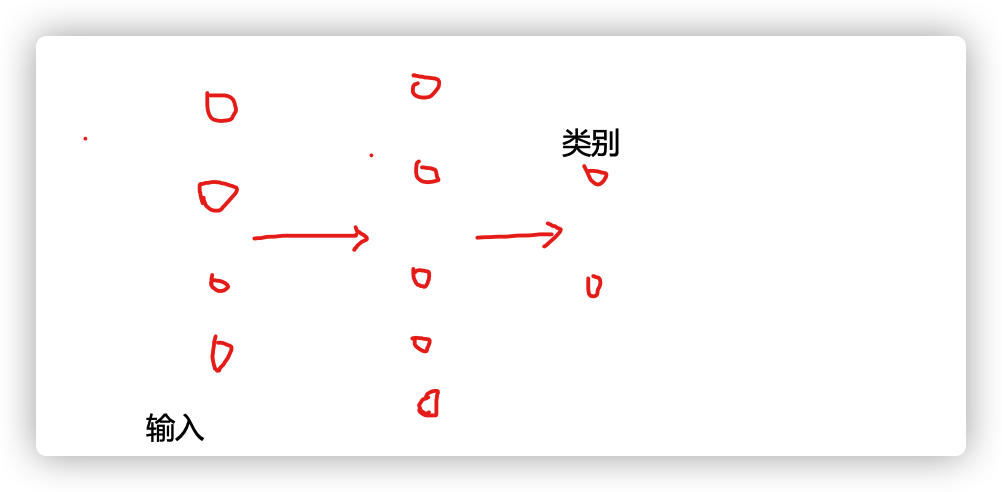

In [27]:
import torch
from torch import nn
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_class):
        super(MLP, self).__init__()
        # 线性变换：输入层->隐含层
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # 使用ReLU激活函数
        self.activate = F.relu
        # 线性变换：隐含层->输出层
        self.linear2 = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs):
        hidden = self.linear1(inputs)
        activation = self.activate(hidden)
        outputs = self.linear2(activation)
        probs = F.softmax(outputs, dim=1) # 获得每个输入属于某一类别的概率
        return probs

mlp = MLP(input_dim=4, hidden_dim=5, num_class=2)
inputs = torch.rand(3, 4) # 输入形状为(3, 4)的张量，其中3表示有3个输入，4表示每个输入的维度
probs = mlp(inputs) # 自动调用forward函数
print(probs) # 输出3个输入对应输出的概率

tensor([[0.6295, 0.3705],
        [0.5887, 0.4113],
        [0.6120, 0.3880]], grad_fn=<SoftmaxBackward0>)


### CNN
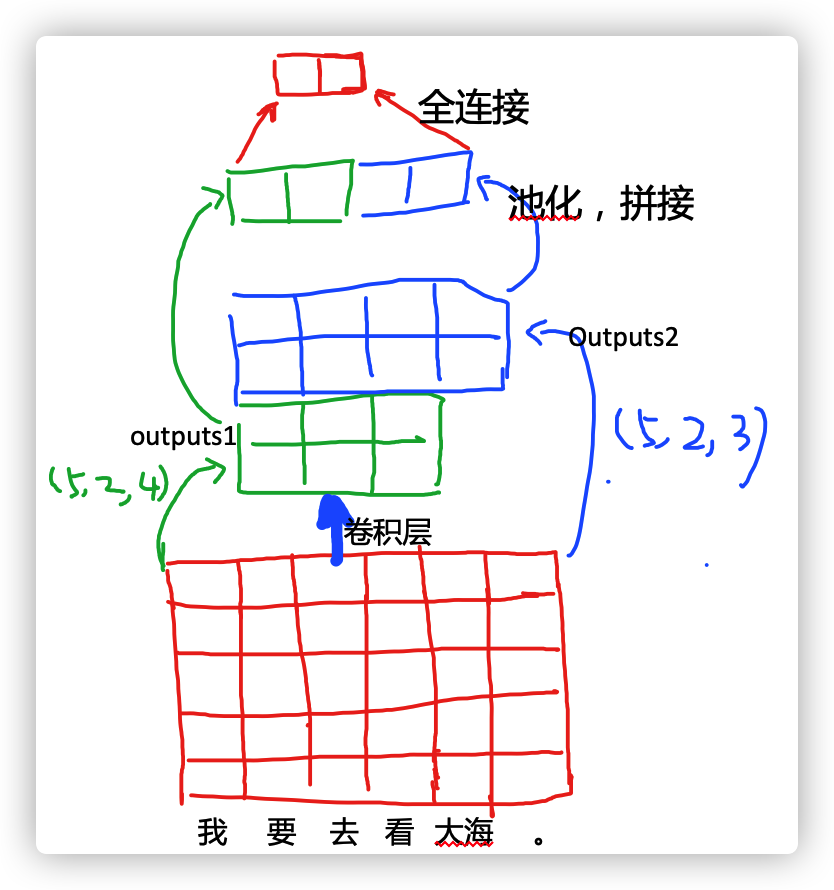

In [8]:
# 卷积实现

import torch
from torch.nn import Conv1d
conv1 = Conv1d(5,2,4)   # （输入词向量维度，卷积核个数， 每个核宽度 ）
conv2 = Conv1d(5,2,3)

inputs = torch.rand(2,5,6) #  2批次，向量维度 5， 每个序列长度为 6
outputs1 = conv1(inputs)
outputs2 = conv2(inputs)
outputs1, outputs2, outputs1.shape

(tensor([[[ 0.1525, -0.0644,  0.3225],
          [ 0.1703,  0.3083,  0.1139]],
 
         [[ 0.0791,  0.1983, -0.0661],
          [ 0.2918,  0.3762,  0.0846]]], grad_fn=<ConvolutionBackward0>),
 tensor([[[ 0.1491, -0.0056, -0.0657, -0.1914],
          [-0.6342, -0.2222, -0.3450, -0.1038]],
 
         [[ 0.1644, -0.0911, -0.3341, -0.0708],
          [-0.5965, -0.2653,  0.0795, -0.3904]]],
        grad_fn=<ConvolutionBackward0>),
 torch.Size([2, 2, 3]))

In [15]:
# 池化
from torch.nn import MaxPool1d
pool1 = MaxPool1d(3)
pool2 = MaxPool1d(4)
outputs_pool1 = pool1(outputs1)
outputs_pool2 = pool1(outputs2)
outputs_pool1, outputs_pool2,  outputs_pool1.dim()

(tensor([[[0.3225],
          [0.3083]],
 
         [[0.1983],
          [0.3762]]], grad_fn=<SqueezeBackward1>),
 tensor([[[ 0.1491],
          [-0.2222]],
 
         [[ 0.1644],
          [ 0.0795]]], grad_fn=<SqueezeBackward1>),
 3)

In [22]:
# 拼接
outputs_pool_squeeze1 = outputs_pool1.squeeze(dim=2)
print(outputs_pool_squeeze1)
outputs_pool_squeeze2 = outputs_pool2.squeeze(dim=2)
print(outputs_pool_squeeze2)
outputs_pool = torch.cat([outputs_pool_squeeze1, outputs_pool_squeeze2], dim=1)
outputs_pool

tensor([[0.3225, 0.3083],
        [0.1983, 0.3762]], grad_fn=<SqueezeBackward1>)
tensor([[ 0.1491, -0.2222],
        [ 0.1644,  0.0795]], grad_fn=<SqueezeBackward1>)


tensor([[ 0.3225,  0.3083,  0.1491, -0.2222],
        [ 0.1983,  0.3762,  0.1644,  0.0795]], grad_fn=<CatBackward0>)

In [23]:
## 全连接，实现分类
from torch.nn import Linear
linear = Linear(4,2)
linear(outputs_pool)

tensor([[ 0.7254, -0.1475],
        [ 0.6868, -0.0672]], grad_fn=<AddmmBackward0>)

### RNN
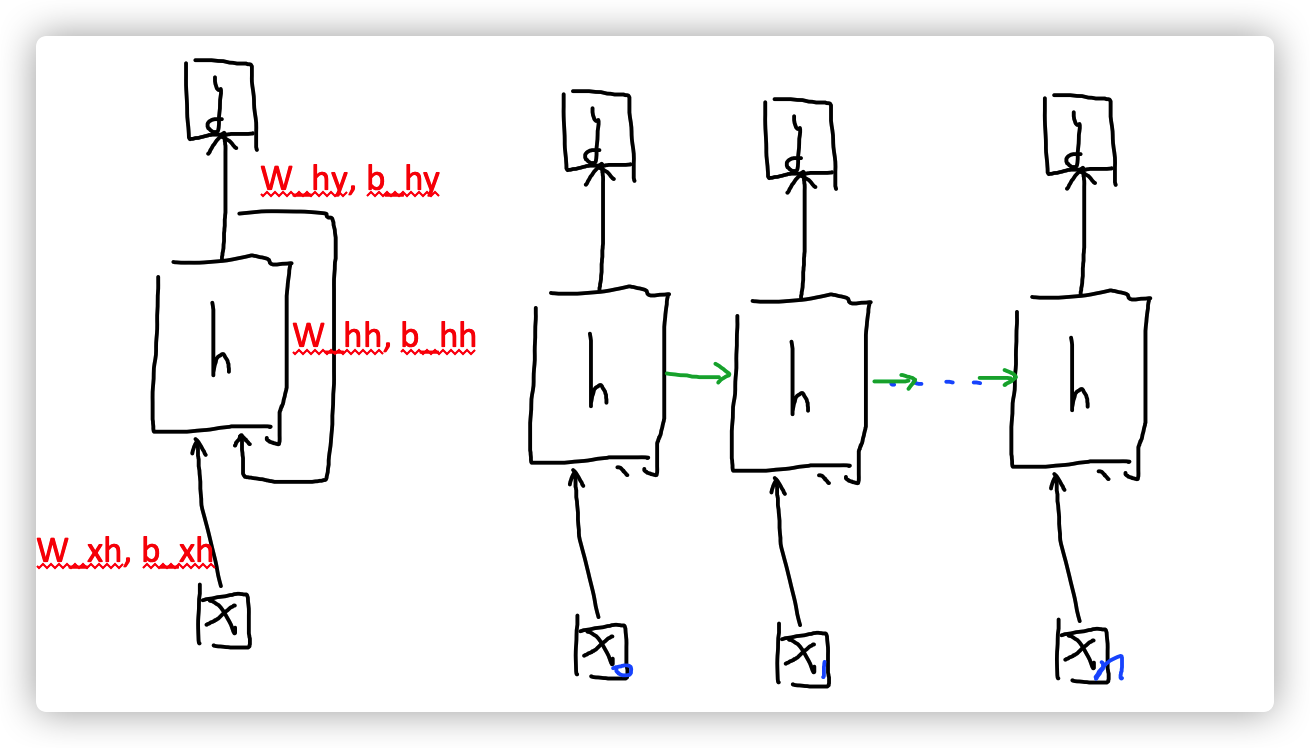

In [15]:
# 实现
"""
batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False
"""
from torch.nn import RNN
# 对于RNN 来说，需要知道输入维度，以及隐藏层输出维度
rnn = RNN(input_size=4, hidden_size=5, batch_first=True)
inputs = torch.rand(2,3,4)  #  (batch, seq, feature)
outputs, hn = rnn(inputs)  # outputs 为输出序列隐藏层，hn 为最后时刻的
outputs, hn

(tensor([[[ 0.5206,  0.2132,  0.0281,  0.1055,  0.1837],
          [ 0.3421,  0.3074, -0.0131,  0.0987, -0.1864],
          [ 0.3430,  0.1647, -0.2433,  0.0686, -0.0902]],
 
         [[ 0.4189,  0.2265, -0.2589,  0.2044,  0.1869],
          [ 0.1689,  0.1760, -0.1484,  0.0767, -0.2019],
          [ 0.3650, -0.0149, -0.1811,  0.0993, -0.0106]]],
        grad_fn=<TransposeBackward1>),
 tensor([[[ 0.3430,  0.1647, -0.2433,  0.0686, -0.0902],
          [ 0.3650, -0.0149, -0.1811,  0.0993, -0.0106]]],
        grad_fn=<StackBackward0>))

In [32]:
# lstm实现

from torch.nn import LSTM
lstm = LSTM(input_size=4, hidden_size=5, batch_first=True)
inputs = torch.rand(2,3,4)  #  (batch, seq, feature)
# outputs 为输出序列隐藏层，hn 为最后时刻的,cn 为最后时刻的记忆cell
outputs, (hn, cn) = lstm(inputs)  
outputs, hn, cn

(tensor([[[ 0.0736,  0.0465,  0.1377,  0.0791, -0.1235],
          [ 0.0768,  0.0338,  0.1956,  0.0293, -0.1300],
          [ 0.1188, -0.0071,  0.2372,  0.0066, -0.1484]],
 
         [[ 0.0856,  0.0006,  0.1674,  0.0893, -0.0964],
          [ 0.0974,  0.0628,  0.2043,  0.0876, -0.1396],
          [ 0.1209,  0.0532,  0.2544,  0.0964, -0.2009]]],
        grad_fn=<TransposeBackward0>),
 tensor([[[ 0.1188, -0.0071,  0.2372,  0.0066, -0.1484],
          [ 0.1209,  0.0532,  0.2544,  0.0964, -0.2009]]],
        grad_fn=<StackBackward0>),
 tensor([[[ 0.3276, -0.0139,  0.4877,  0.0092, -0.2837],
          [ 0.3989,  0.1134,  0.6412,  0.1216, -0.3780]]],
        grad_fn=<StackBackward0>))

### Transformer
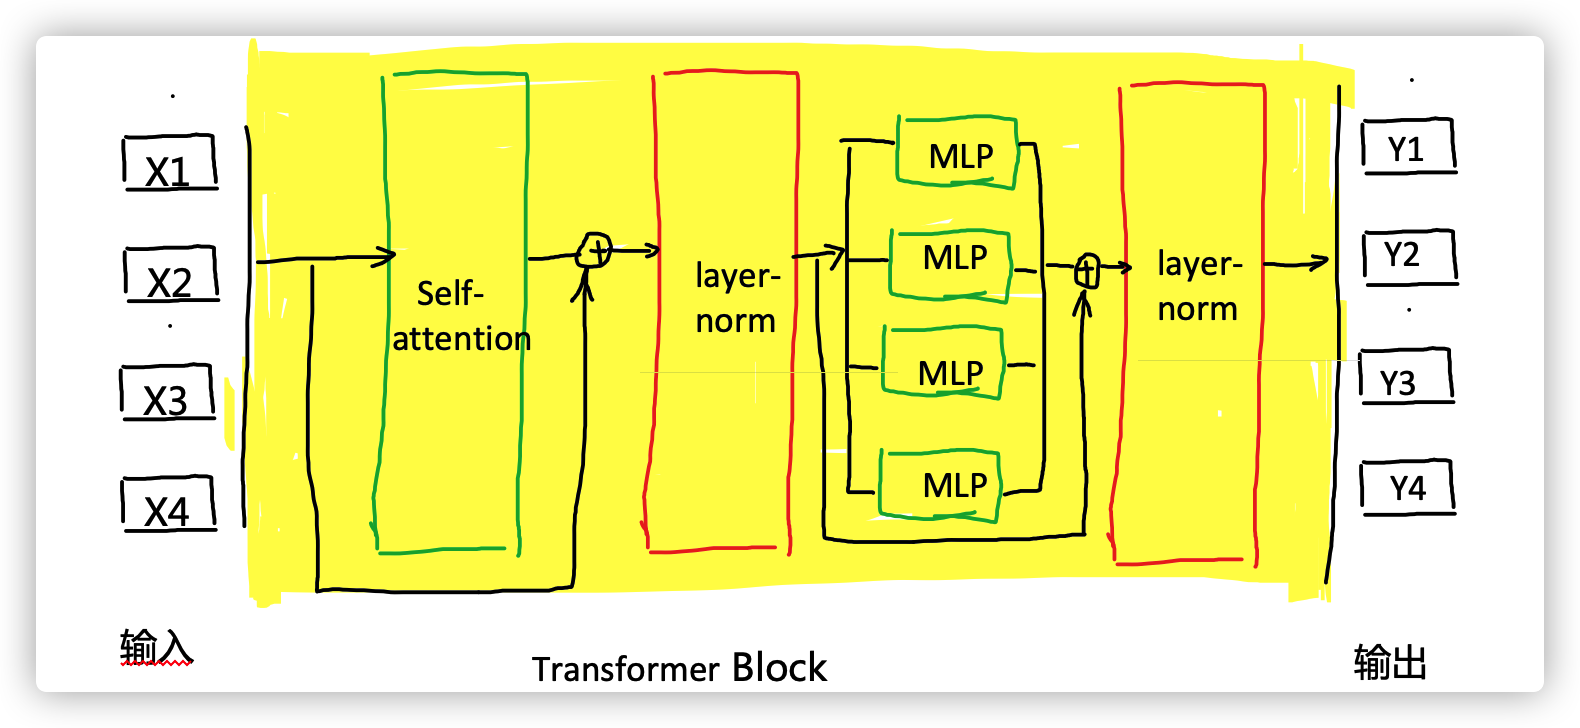

In [58]:
import torch
from torch import nn
# encoder 结构，输入、输出维度为4
encoder_layer = nn.TransformerEncoderLayer(d_model=4, nhead=2)  # 每个输入向量、输出向量维度为4， 头数为
src = torch.rand(2,3,4)  # 序列长度，批次，向量维度
out = encoder_layer(src)
out, out.shape

(tensor([[[ 0.7505,  1.2190, -1.0597, -0.9098],
          [ 1.0675, -1.6417,  0.3006,  0.2736],
          [-0.9064,  1.4749,  0.3644, -0.9329]],
 
         [[-0.5376, -0.5572,  1.7309, -0.6361],
          [ 0.9547, -0.1063,  0.7415, -1.5898],
          [ 1.0132, -0.5985,  0.9172, -1.3319]]],
        grad_fn=<NativeLayerNormBackward0>),
 torch.Size([2, 3, 4]))

- 将多个 Transformer块 堆叠
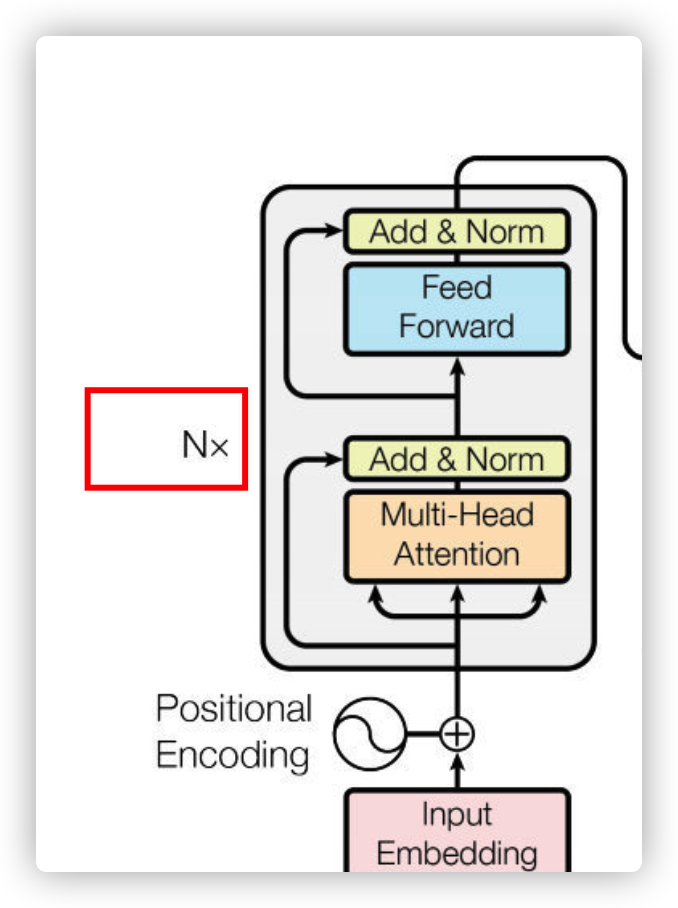



In [59]:

transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
transformer_encoder(src)

tensor([[[-7.1689e-04,  1.6127e+00, -5.8252e-01, -1.0295e+00],
         [ 1.7082e+00, -8.3320e-01, -3.8690e-01, -4.8806e-01],
         [ 6.2268e-02,  1.1571e+00,  3.6849e-01, -1.5879e+00]],

        [[ 6.3318e-01, -1.7903e-01,  1.0890e+00, -1.5431e+00],
         [ 1.3231e+00,  4.7394e-01, -4.4566e-01, -1.3514e+00],
         [ 9.1392e-01, -5.6437e-01,  1.0053e+00, -1.3548e+00]]],
       grad_fn=<NativeLayerNormBackward0>)

- 解码

In [7]:
memory = transformer_encoder(src)
decoder_layer = nn.TransformerDecoderLayer(d_model=4, nhead=2)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
out_part = torch.rand(2,3,4)
transformer_decoder(out_part, memory)

tensor([[[-1.2931, -0.5654,  1.3042,  0.5543],
         [-0.1598,  0.3754, -1.4881,  1.2724],
         [ 1.0663, -0.2951, -1.4988,  0.7276]],

        [[-1.1753, -0.7455,  1.2906,  0.6302],
         [ 0.0716,  0.0912, -1.4908,  1.3281],
         [ 0.6995,  0.1632, -1.6787,  0.8160]]],
       grad_fn=<NativeLayerNormBackward0>)